In [ ]:
# 基于mnist数据集建立MLP模型实现数字识别

In [2]:
# Load the data
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(type(x_train),x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


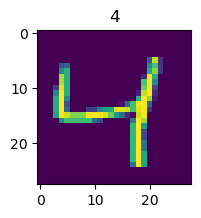

In [3]:
# visulize the data
img1 =x_train[2]
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(2,2))
plt.imshow(img1)
plt.title(y_train[2])
plt.show()

In [4]:
# data reshape
print(img1.shape)
feature_size = img1.shape[0] * img1.shape[1]
x_train_format = x_train.reshape(x_train.shape[0],feature_size)
x_test_format = x_test.reshape(x_test.shape[0],feature_size)
x_train_normal = x_train_format/255
x_test_normal = x_test_format/255
print(x_test_normal)

(28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# reshape the output
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format =  to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
## establish the model
from keras.models import Sequential
from keras.layers import Dense, Activation
mlp = Sequential()
mlp.add(Dense(units=392, activation='relu',input_dim = feature_size))
mlp.add(Dense(units=392, activation = 'relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.compile(loss='mean_absolute_error', optimizer='sgd')
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
mlp.fit(x_train_format,y_train_format,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1489
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1393
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1227
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1050
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1036
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1031
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1022
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1020
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1016
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1013
Epoch 12/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1013
E

In [8]:
# valuate the model
import numpy as np
y_train_predict = mlp.predict(x_train_normal)
y_train_predict = np.argmax(y_train_predict,axis=1)
print(y_train_predict)

1875/1875 [==============================] - 4s 2ms/step
[5 0 9 ... 5 6 8]


In [9]:
# accurancy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,y_train_predict)
print(accuracy)

0.8768666666666667


In [11]:
# test the test data
y_test_predict = mlp.predict(x_test_normal)
y_test_predict = np.argmax(y_test_predict,axis = 1)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

313/313 [==============================] - 1s 2ms/step
0.8713


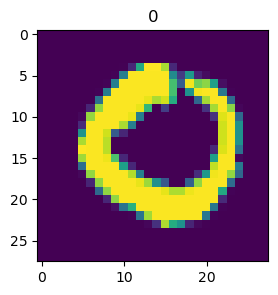

In [14]:
# visulize the test data
img2= x_test[1223]
fig2= plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[1223])
plt.show()